## Code ALongs - MLP - Multilayered perceptron

In [109]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [110]:
x_train.shape

(60000, 28, 28)

7

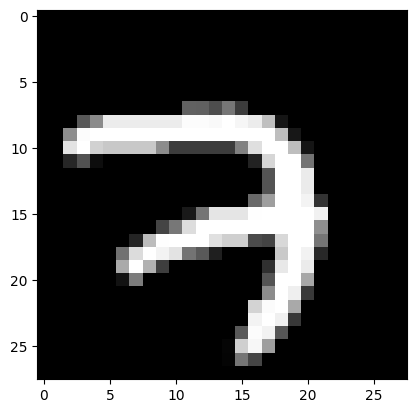

In [111]:

plt.imshow(x_train[5000], cmap="gray")
y_train[5000]

In [112]:
x_train[5000].shape

(28, 28)

In [113]:
# 2D image for index 5000 - it contains 28x28 
x_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [114]:
# Pixel intesity between 0 and 254 for this image
x_train[5000].min(), x_train[5000].max()

(0, 254)

In [115]:
# Pixel value at row 10, column 5 for image 5000
x_train[5000, 10, 5]

199

In [116]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [117]:
y_train.shape, y_train.min(), y_train.max()

((60000,), 0, 9)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

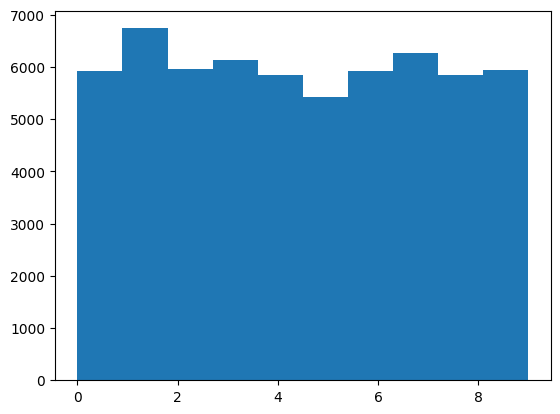

In [118]:
plt.hist(y_train)

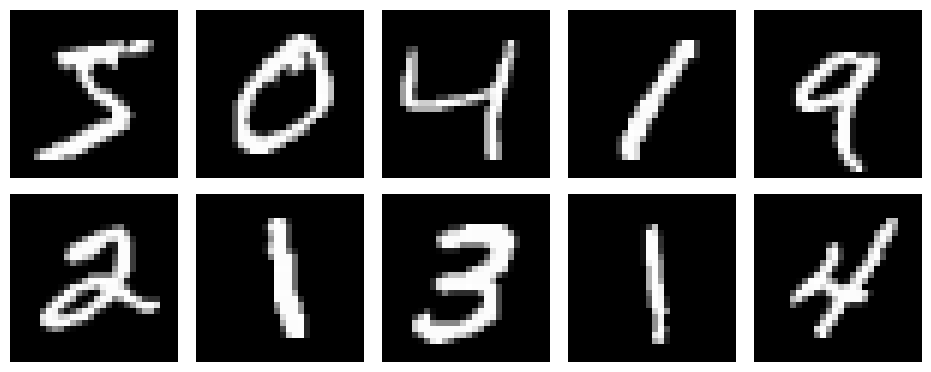

In [119]:
def display_images(data, n_rows = 2, n_cols = 5, figsize = (12, 4)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap="gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=0.1, bottom=0)


display_images(x_train)

(10, 28, 28)

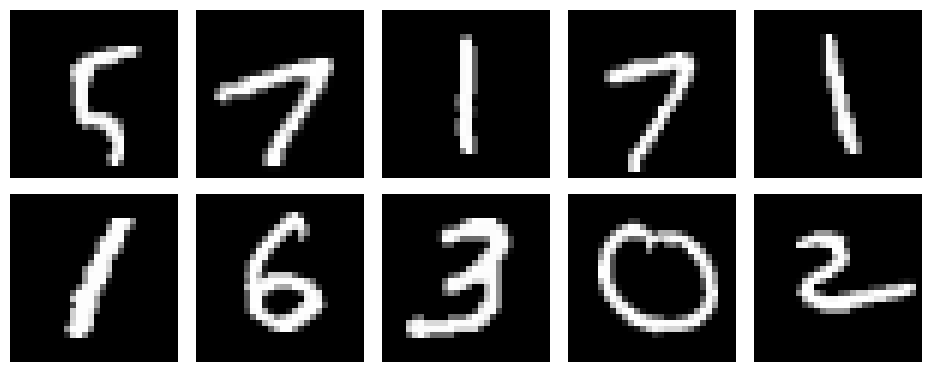

In [120]:
display_images(X_train[100:110])
x_train[100:110].shape

## Normalize Data

In [121]:
X_train = x_train.astype("float32")/255
X_test = x_test.astype("float32")/255

X_train.min(), X_train.max()

(0.0, 1.0)

In [122]:
X_train[5000].reshape(-1).shape

(784,)

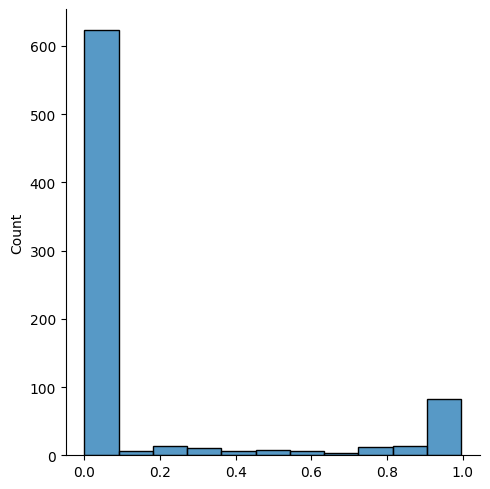

In [123]:
import seaborn as sns

sns.displot(data = X_train[5000].reshape(-1), kind="hist")

## MLP model

- 10 output neurons/nodes (Which represents 0-9, our classes)
- softmax activation function in output layer -> probabilities
- 784 neurons for input layer (28*28) -> use Flatten layer
- hidden layers -> Dense

In [124]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense 

def mlp_model(neurons: tuple | list = None, names: tuple | list = None, activations: tuple | list = []):
    model = Sequential(name = "MLP_model")
    model.add(Flatten(input_shape=(28, 28), name = "Input_layer"))
    
    ## Hidden layers + outputs
    for neuron, name, activation in zip(neurons, names, activations):
        model.add(Dense(neuron, name=name, activation=activation))

    model.compile(
        loss = "sparse_categorical_crossentropy", optimizer="adam", metrics = ["accuracy"]
    )

    
    return model

# Naive because we don't have any hidden layers
model_naive = mlp_model(neurons={10}, names={"Output_layer"}, activations={"softmax"})
model_naive.summary()

c:\School Code\OPA23\Artificial_Intelligence_Hampus_Erlandsson_OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
model_naive.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.7942 - loss: 0.7835 - val_accuracy: 0.9153 - val_loss: 0.3120
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.9100 - loss: 0.3255 - val_accuracy: 0.9219 - val_loss: 0.2762
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.9188 - loss: 0.2938 - val_accuracy: 0.9257 - val_loss: 0.2693
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.9232 - loss: 0.2741 - val_accuracy: 0.9264 - val_loss: 0.2662
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.9231 - loss: 0.2744 - val_accuracy: 0.9292 - val_loss: 0.2583
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.9275 - loss: 0.2652 - val_accuracy: 0.9300 - val_loss: 0.2554
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.9260 - loss: 0.2625 - val_accuracy: 0.9305 - val_loss: 0.2537
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.9294 -

In [126]:
import pandas as pd

naive_history = pd.DataFrame(model_naive.history.history)
naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.86848,0.504641,0.9153,0.312005
1,0.91196,0.316609,0.9219,0.276216
2,0.91804,0.292504,0.9257,0.269344
3,0.92132,0.280910,0.9264,0.266230
4,0.92264,0.273759,0.9292,0.258323


In [127]:
model_naive.history.history

{'accuracy': [0.8684800267219543,
  0.9119600057601929,
  0.9180399775505066,
  0.9213200211524963,
  0.9226400256156921,
  0.9254599809646606,
  0.9259200096130371,
  0.9274600148200989,
  0.927619993686676,
  0.9289600253105164,
  0.9289000034332275,
  0.9295399785041809,
  0.9300400018692017,
  0.9309200048446655,
  0.9317600131034851,
  0.9315999746322632,
  0.9322599768638611,
  0.9319000244140625,
  0.9332399964332581,
  0.9323400259017944],
 'loss': [0.5046408772468567,
  0.3166085481643677,
  0.29250431060791016,
  0.2809104323387146,
  0.27375873923301697,
  0.26817944645881653,
  0.26422709226608276,
  0.2609767019748688,
  0.25786393880844116,
  0.2557455003261566,
  0.2539924085140228,
  0.25180068612098694,
  0.2503052353858948,
  0.24884970486164093,
  0.24693919718265533,
  0.24644149839878082,
  0.24530741572380066,
  0.2442903369665146,
  0.24301362037658691,
  0.24230867624282837],
 'val_accuracy': [0.9153000116348267,
  0.9218999743461609,
  0.9257000088691711,
  0.9

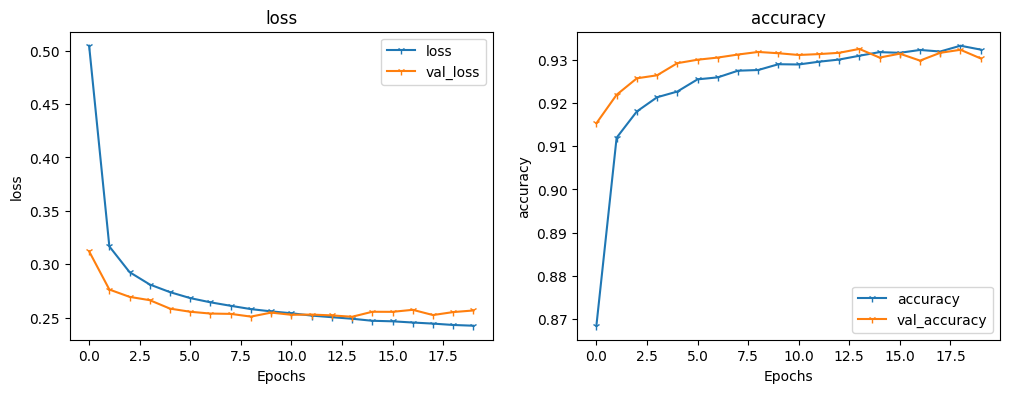

In [128]:
def plot_metrics(df_history, style="-1"):
    _, axes = plt.subplots(1,2,figsize=(12,4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(y=metric, xlabel="Epochs", ylabel=metric[0], title=metric[0], ax=ax, style=style)

plot_metrics(naive_history)


## Add hidden layers

In [129]:
model_deep = mlp_model(neurons=[128,128,10], activations=["relu", "relu", "softmax"], names=["Hidden_1", "Hidden_2", "Output"])

model_deep.summary()

c:\School Code\OPA23\Artificial_Intelligence_Hampus_Erlandsson_OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [130]:
model_deep.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8750 - loss: 0.4414 - val_accuracy: 0.9568 - val_loss: 0.1395
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9674 - loss: 0.1075 - val_accuracy: 0.9684 - val_loss: 0.1058
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9789 - loss: 0.0695 - val_accuracy: 0.9736 - val_loss: 0.0876
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9841 - loss: 0.0491 - val_accuracy: 0.9710 - val_loss: 0.1066
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9872 - loss: 0.0405 - val_accuracy: 0.9762 - val_loss: 0.0896
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9898 - loss: 0.0317 - val_accuracy: 0.9767 - val_loss: 0.0903
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9911 - loss: 0.0263 - val_accuracy: 0.9772 - val_loss: 0.1011
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9918 - loss: 0.0230 - 

In [131]:
deep_history = pd.DataFrame(model_deep.history.history)
deep_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.92710,0.251147,0.9568,0.139485
1,0.96854,0.102373,0.9684,0.105794
2,0.97842,0.070720,0.9736,0.087574
3,0.98286,0.053272,0.9710,0.106579
4,0.98666,0.041201,0.9762,0.089607


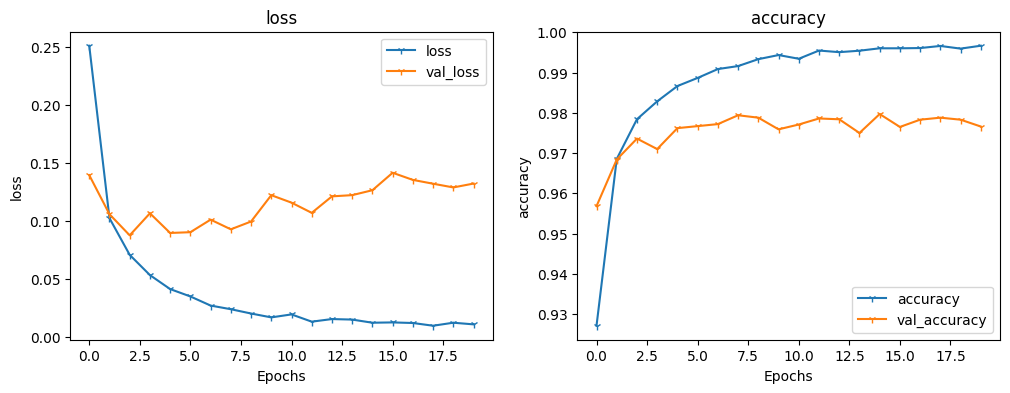

In [132]:
plot_metrics(deep_history)

In [133]:
# Trains on all training data
model_deep.fit(X_train, y_train, epochs=3, verbose=1)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9930 - loss: 0.0294
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9966 - loss: 0.0122
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9968 - loss: 0.0105


## Prediction and evaluation

In [134]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_deep.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step


array([[4.82871189e-14, 2.09784599e-12, 6.95095240e-12, ...,
        1.00000000e+00, 5.79774002e-17, 1.18379040e-09],
       [1.38356787e-22, 1.35825214e-14, 1.00000000e+00, ...,
        1.27838943e-24, 9.73604506e-19, 1.31857095e-34],
       [1.75119867e-11, 9.99999523e-01, 1.66373704e-09, ...,
        1.07960489e-07, 8.82982842e-09, 3.81721564e-11],
       ...,
       [1.64505710e-17, 2.63761428e-16, 1.51313114e-22, ...,
        3.50729233e-12, 2.31701665e-19, 7.22664462e-09],
       [3.19015613e-20, 4.49063685e-24, 2.23783815e-25, ...,
        7.03077845e-17, 1.52925025e-12, 7.38252184e-22],
       [1.78047463e-18, 1.42755492e-18, 3.77470348e-18, ...,
        1.31724338e-19, 1.57036165e-14, 2.48180860e-18]], dtype=float32)

In [137]:
y_pred[0]

array([4.8287119e-14, 2.0978460e-12, 6.9509524e-12, 2.7445196e-10,
       2.8341902e-14, 6.7351566e-15, 1.4316794e-16, 1.0000000e+00,
       5.7977400e-17, 1.1837904e-09], dtype=float32)

In [138]:
y_pred.shape

(10000, 10)

In [143]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
cm = confusion_matrix

## Some misclassifications

In [145]:
y_pred != y_test

array([False, False, False, ..., False, False, False])